In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#sys.path.insert(0, '/Users/ammar.tareen/Desktop/Research_projects/mavenn2/')
sys.path.insert(0, '/Users/tareen/Desktop/Research_Projects/2022_mavenn2_github/mavenn')

import mavenn
import logomaker
import seaborn as sns
import re

%matplotlib inline

In [2]:
data_df_full_lib_1 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib1.csv')
y_cols = list(data_df_full_lib_1.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_1 = data_df_full_lib_1[cols].copy()

data_df_full_lib_2 = pd.read_csv('../data/2022.05.15.ace2rbd/ace2rbd_raw_counts_lib2.csv')
y_cols = list(data_df_full_lib_2.columns[8:])
cols = y_cols.copy()
cols.insert(0,'x')
data_df_lib_2 = data_df_full_lib_2[cols].copy()

In [3]:
data_df = pd.concat([data_df_lib_1,data_df_lib_2]).reset_index(drop=True).copy()
data_df.head()

,x,TiteSeq_01_bin1,TiteSeq_01_bin2,TiteSeq_01_bin3,TiteSeq_01_bin4,TiteSeq_02_bin1,TiteSeq_02_bin2,TiteSeq_02_bin3,TiteSeq_02_bin4,TiteSeq_03_bin1,...,TiteSeq_14_bin3,TiteSeq_14_bin4,TiteSeq_15_bin1,TiteSeq_15_bin2,TiteSeq_15_bin3,TiteSeq_15_bin4,TiteSeq_16_bin1,TiteSeq_16_bin2,TiteSeq_16_bin3,TiteSeq_16_bin4
0,NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NITNLCPFGEVFSATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,0,0,0,0,0,0,1,...,0,0,21,0,0,0,17,0,0,0
2,NITNLCPFGEVFNATRFASVYCWNRKRISNCVADYSVLYNSASFST...,6,35,162,4,24,85,80,30,10,...,37,0,151,4,0,0,154,19,0,0
3,NITNLCPFGEVFFATRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,1,3,439,1,0,14,307,17,...,82,0,180,12,0,12,306,20,0,0
4,NITNLKPFGEVFNAWRFASVYAWNRKRISNCVADYSVLYNSASFST...,0,0,3,0,0,0,0,0,4,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# y_cols_1 = list(data_df_full.columns[8:12])
# y_cols_2 = list(data_df_full.columns[68:72])

In [5]:
#y = data_df[y_cols_1+y_cols_2]

In [6]:
X = data_df['x']
y = data_df[y_cols]

In [7]:
from sklearn.model_selection import train_test_split

# split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [8]:
# set positional argumnets for gpmap function
L = len(data_df['x'][0])
alphabet=['A', 'C', 'D', 'E', 'F',
          'G', 'H', 'I', 'K', 'L',
          'M', 'N', 'P', 'Q', 'R',
          'S', 'T', 'V', 'W', 'Y',]


Y = len(y_cols)
#Y = 8
print(f'L={L}, Y={Y}')

L=201, Y=64


In [9]:
# instantiate gpmap object
# gpmap = mavenn.gpmap.Multi_AdditiveGPMapLayer(L=L, 
#                                               alphabet=alphabet,
#                                               number_latent_nodes=2)

gpmap = mavenn.gpmap.AdditiveGPMapLayer(L, alphabet)



2022-08-08 23:31:59.860001: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# read in parameters

# number of reads in each bin summed
N_y = np.sum(y,axis=0)

In [11]:
print(N_y)

TiteSeq_01_bin1     5282064
TiteSeq_01_bin2     2420062
TiteSeq_01_bin3     3563327
TiteSeq_01_bin4    13256660
TiteSeq_02_bin1     5094914
                     ...   
TiteSeq_15_bin4      621457
TiteSeq_16_bin1    23064475
TiteSeq_16_bin2     1582135
TiteSeq_16_bin3     3128968
TiteSeq_16_bin4      725998
Length: 64, dtype: int64


#### I approximated these values from Fig 2B

In [12]:
bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,250000]]))
#bounds = np.log(np.array([[1,180],[180,1400],[1400,10500],[10500,200000]]))

bounds_df = pd.DataFrame(bounds,columns=['lower_bound','upper_bound'])
f_y_lower_bounds = bounds_df['lower_bound'].values
f_y_upper_bounds = bounds_df['upper_bound'].values
bounds_df

,lower_bound,upper_bound
0,0.000000,5.192957
1,5.192957,7.244228
2,7.244228,9.259131
3,9.259131,12.429216


I don't know how to obtain these values. I based them roughly on Figure 2 from Star et al

In [13]:
mu_neg = np.log10(50)
mu_pos = np.log10(70000)

sigma_neg = 2.0
sigma_pos = 2.0

In [14]:
mu_pos, mu_neg

(4.845098040014257, 1.6989700043360187)

In [15]:
f_y_upper_bounds

array([ 5.19295685,  7.24422752,  9.25913054, 12.4292162 ])

In [16]:
#np.arange(10**(-13),10**(-6),10**(-12))
cs = [0,10**(-13),10**(-12.5),
     10**(-12),10**(-11.5),
     10**(-11),10**(-10.5),
     10**(-10),10**(-9.5),
     10**(-9),10**(-8.5),
     10**(-8),10**(-7.5),
     10**(-7),10**(-6.5),
     10**(-6)]

In [17]:
cs

[0,
 1e-13,
 3.162277660168379e-13,
 1e-12,
 3.1622776601683794e-12,
 1e-11,
 3.1622776601683794e-11,
 1e-10,
 3.1622776601683795e-10,
 1e-09,
 3.1622776601683795e-09,
 1e-08,
 3.162277660168379e-08,
 1e-07,
 3.162277660168379e-07,
 1e-06]

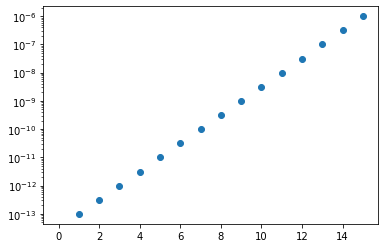

In [19]:
plt.plot(cs,'o')
plt.yscale('log')

In [20]:

# #cs = [0,10**(-6)]

# # this numerical range appears to work appears 
# #cs = np.arange(0.1,1,0.06)/1000
# plt.figure(figsize=(4,4))

# for factor in [100]:
#     plt.plot(np.arange(0.1,1,0.06)[1:]/1000,cs[1:],'o',label=str(factor))
# #plt.plot(np.arange(0.1,1,0.06)/1000,np.log(np.array(cs)+(1e-13)),'o',label=str(factor))
# plt.xlabel('concentrations that made inference work')
# plt.ylabel('concentrations from fig-2')
# plt.yscale('log')
# #plt.legend()

In [21]:
mp_list = [mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[4*mp_idx:4*mp_idx+4],
                                                         #c=cs[16-1-mp_idx],
                                                         c=cs[mp_idx],
                                                         Y=4,
                                                         mu_pos=mu_pos,
                                                         sigma_pos=sigma_pos,
                                                         mu_neg=mu_neg,
                                                         sigma_neg=sigma_neg,
                                                         f_y_lower_bounds=f_y_lower_bounds,
                                                         f_y_upper_bounds=f_y_upper_bounds,
                                                         info_for_layers_dict={'H_y_norm':0},
                                                         eta=1e-5,)
           for mp_idx in range(len(y_cols)//4)
          ]

In [22]:
#mp_list

In [23]:
# TiteSeq_mp_1 = mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[0:4],
#                                                          c=0,
#                                                          Y=4,
#                                                          mu_pos=mu_pos,
#                                                          sigma_pos=sigma_pos,
#                                                          mu_neg=mu_neg,
#                                                          sigma_neg=sigma_neg,
#                                                          f_y_lower_bounds=f_y_lower_bounds,
#                                                          f_y_upper_bounds=f_y_upper_bounds,
#                                                          info_for_layers_dict={'H_y_norm':0},
#                                                          eta=1e-5,
#                                                          )

# TiteSeq_mp_2 = mavenn.measurement_process_layers.TiteSeqMP(N_y=N_y[4:8],
#                                                          c=10**(-6),
#                                                          Y=4,
#                                                          mu_pos=mu_pos,
#                                                          sigma_pos=sigma_pos,
#                                                          mu_neg=mu_neg,
#                                                          sigma_neg=sigma_neg,
#                                                          f_y_lower_bounds=f_y_lower_bounds,
#                                                          f_y_upper_bounds=f_y_upper_bounds,
#                                                          info_for_layers_dict={'H_y_norm':0},
#                                                          eta=1e-5,
#                                                          )

In [24]:
# model = mavenn.Model2(gpmap=gpmap,
#                       mp_list=mp_list)

model = mavenn.Model2(gpmap=gpmap,
                      mp_list=mp_list)

In [25]:
model.model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Sequence_labels_input (InputLa  [(None, 4084)]      0           []                               
 yer)                                                                                             
                                                                                                  
 Sequence_only (Lambda)         (None, 4020)         0           ['Sequence_labels_input[0][0]']  
                                                                                                  
 additive_gp_map_layer (Additiv  (None, 1)           4021        ['Sequence_only[0][0]']          
 eGPMapLayer)                                                                                     
                                                                                              

In [26]:
#y_train[y_cols_2]

In [27]:
# Set training data
model.set_data(x=x_train,
               
               y_list=[
                       y_train[y_cols[0:4]].values,
                       y_train[y_cols[4:8]].values,
                       y_train[y_cols[8:12]].values,
                       y_train[y_cols[12:16]].values,
                       y_train[y_cols[16:20]].values,
                       y_train[y_cols[20:24]].values,
                       y_train[y_cols[24:28]].values,
                       y_train[y_cols[28:32]].values,
                       y_train[y_cols[32:36]].values,
                       y_train[y_cols[36:40]].values,
                       y_train[y_cols[40:44]].values,
                       y_train[y_cols[44:48]].values,
                       y_train[y_cols[48:52]].values,
                       y_train[y_cols[52:56]].values,                   
                       y_train[y_cols[56:60]].values,                                      
                       y_train[y_cols[60:64]].values,                                                         
                      ],

               shuffle=True)

N = 165,825 observations set as training data.
Using 19.9% for validation.
Data shuffled.
Time to set data: 42.3 sec.


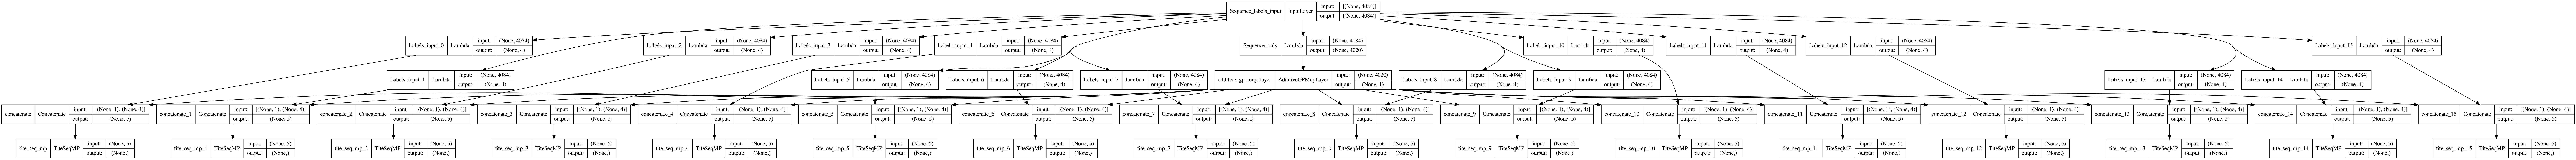

In [28]:
from tensorflow.keras.utils import plot_model
plot_model(model.model,show_shapes=True,show_dtype=False,dpi=200,to_file='titeseq_mp_16_heads.png')

In [29]:

# Fit model to data
model.fit(learning_rate=.0005,
          epochs=200,
          batch_size=300,
          try_tqdm = False,
          early_stopping=False,
          early_stopping_patience=10,
          linear_initialization=False)

Epoch 1/200
443/443 [==============================] - 27s 32ms/step - loss: 11843097.0000 - tite_seq_mp_loss: 1255999.2500 - tite_seq_mp_1_loss: 1168334.6250 - tite_seq_mp_2_loss: 1200796.1250 - tite_seq_mp_3_loss: 1444837.8750 - tite_seq_mp_4_loss: 1211580.3750 - tite_seq_mp_5_loss: 1211911.0000 - tite_seq_mp_6_loss: 1337620.0000 - tite_seq_mp_7_loss: 868331.0625 - tite_seq_mp_8_loss: 612514.5000 - tite_seq_mp_9_loss: 307396.6875 - tite_seq_mp_10_loss: 220024.0469 - tite_seq_mp_11_loss: 323179.9062 - tite_seq_mp_12_loss: 182968.7344 - tite_seq_mp_13_loss: 133765.0938 - tite_seq_mp_14_loss: 153973.2812 - tite_seq_mp_15_loss: 209856.7188 - I_var: -5.4619 - val_loss: 11733651.0000 - val_tite_seq_mp_loss: 1181214.5000 - val_tite_seq_mp_1_loss: 1100267.2500 - val_tite_seq_mp_2_loss: 1122570.2500 - val_tite_seq_mp_3_loss: 1555019.0000 - val_tite_seq_mp_4_loss: 1189407.8750 - val_tite_seq_mp_5_loss: 1182199.1250 - val_tite_seq_mp_6_loss: 1313386.8750 - val_tite_seq_mp_7_loss: 790399.1875 - 

443/443 [==============================] - 6s 12ms/step - loss: 10884232.0000 - tite_seq_mp_loss: 1207755.7500 - tite_seq_mp_1_loss: 1121320.5000 - tite_seq_mp_2_loss: 1145669.6250 - tite_seq_mp_3_loss: 1262642.1250 - tite_seq_mp_4_loss: 1163784.8750 - tite_seq_mp_5_loss: 1155932.7500 - tite_seq_mp_6_loss: 1285708.5000 - tite_seq_mp_7_loss: 804891.5000 - tite_seq_mp_8_loss: 506126.4688 - tite_seq_mp_9_loss: 227692.5781 - tite_seq_mp_10_loss: 188808.0156 - tite_seq_mp_11_loss: 271313.6875 - tite_seq_mp_12_loss: 148965.7344 - tite_seq_mp_13_loss: 100007.8906 - tite_seq_mp_14_loss: 125425.5078 - tite_seq_mp_15_loss: 168186.9688 - I_var: -4.1700 - val_loss: 10407085.0000 - val_tite_seq_mp_loss: 1163970.6250 - val_tite_seq_mp_1_loss: 1081091.7500 - val_tite_seq_mp_2_loss: 1099249.0000 - val_tite_seq_mp_3_loss: 1211599.0000 - val_tite_seq_mp_4_loss: 1116503.8750 - val_tite_seq_mp_5_loss: 1097493.8750 - val_tite_seq_mp_6_loss: 1221827.3750 - val_tite_seq_mp_7_loss: 773082.4375 - val_tite_seq_

443/443 [==============================] - 6s 14ms/step - loss: 9823162.0000 - tite_seq_mp_loss: 1165126.6250 - tite_seq_mp_1_loss: 1078784.7500 - tite_seq_mp_2_loss: 1097156.6250 - tite_seq_mp_3_loss: 947683.1875 - tite_seq_mp_4_loss: 1120506.8750 - tite_seq_mp_5_loss: 1100375.1250 - tite_seq_mp_6_loss: 1235969.3750 - tite_seq_mp_7_loss: 745065.1250 - tite_seq_mp_8_loss: 431813.0000 - tite_seq_mp_9_loss: 143238.8906 - tite_seq_mp_10_loss: 138351.8750 - tite_seq_mp_11_loss: 207599.1875 - tite_seq_mp_12_loss: 112395.2656 - tite_seq_mp_13_loss: 69319.0391 - tite_seq_mp_14_loss: 99522.8906 - tite_seq_mp_15_loss: 130256.2656 - I_var: -2.9948 - val_loss: 8791409.0000 - val_tite_seq_mp_loss: 1123964.7500 - val_tite_seq_mp_1_loss: 1042152.5625 - val_tite_seq_mp_2_loss: 1054890.2500 - val_tite_seq_mp_3_loss: 453222.2500 - val_tite_seq_mp_4_loss: 1076695.0000 - val_tite_seq_mp_5_loss: 1049682.1250 - val_tite_seq_mp_6_loss: 1176332.6250 - val_tite_seq_mp_7_loss: 718680.5625 - val_tite_seq_mp_8_l

443/443 [==============================] - 6s 14ms/step - loss: 2853956.7500 - tite_seq_mp_loss: 265979.6562 - tite_seq_mp_1_loss: 275526.6875 - tite_seq_mp_2_loss: 259542.9219 - tite_seq_mp_3_loss: 284235.3438 - tite_seq_mp_4_loss: 284351.6562 - tite_seq_mp_5_loss: 295680.4688 - tite_seq_mp_6_loss: 319794.9688 - tite_seq_mp_7_loss: 228933.5469 - tite_seq_mp_8_loss: 184970.1719 - tite_seq_mp_9_loss: 83731.8281 - tite_seq_mp_10_loss: 64896.0664 - tite_seq_mp_11_loss: 95458.2891 - tite_seq_mp_12_loss: 57323.6836 - tite_seq_mp_13_loss: 41128.8477 - tite_seq_mp_14_loss: 48165.7188 - tite_seq_mp_15_loss: 64236.4102 - I_var: -1.0097 - val_loss: 2631429.5000 - val_tite_seq_mp_loss: 245384.7812 - val_tite_seq_mp_1_loss: 254774.7656 - val_tite_seq_mp_2_loss: 238893.0469 - val_tite_seq_mp_3_loss: 261125.1562 - val_tite_seq_mp_4_loss: 261931.0625 - val_tite_seq_mp_5_loss: 270938.5312 - val_tite_seq_mp_6_loss: 291313.1250 - val_tite_seq_mp_7_loss: 212098.2812 - val_tite_seq_mp_8_loss: 170225.2500 

443/443 [==============================] - 7s 15ms/step - loss: 1733891.7500 - tite_seq_mp_loss: 151754.1094 - tite_seq_mp_1_loss: 158035.3125 - tite_seq_mp_2_loss: 150150.8438 - tite_seq_mp_3_loss: 163705.6875 - tite_seq_mp_4_loss: 162342.7969 - tite_seq_mp_5_loss: 173297.9844 - tite_seq_mp_6_loss: 183022.9844 - tite_seq_mp_7_loss: 139928.8281 - tite_seq_mp_8_loss: 115183.7188 - tite_seq_mp_9_loss: 59006.4258 - tite_seq_mp_10_loss: 54168.5391 - tite_seq_mp_11_loss: 72958.8438 - tite_seq_mp_12_loss: 43057.2539 - tite_seq_mp_13_loss: 29161.2793 - tite_seq_mp_14_loss: 34586.5078 - tite_seq_mp_15_loss: 43530.7656 - I_var: -0.3704 - val_loss: 1610034.3750 - val_tite_seq_mp_loss: 140009.3281 - val_tite_seq_mp_1_loss: 145927.2812 - val_tite_seq_mp_2_loss: 138335.6719 - val_tite_seq_mp_3_loss: 153000.0625 - val_tite_seq_mp_4_loss: 149138.4375 - val_tite_seq_mp_5_loss: 158758.5469 - val_tite_seq_mp_6_loss: 166876.9062 - val_tite_seq_mp_7_loss: 130393.1719 - val_tite_seq_mp_8_loss: 107299.2578 

443/443 [==============================] - 9s 20ms/step - loss: 1288333.0000 - tite_seq_mp_loss: 98869.1016 - tite_seq_mp_1_loss: 100544.9766 - tite_seq_mp_2_loss: 100258.7422 - tite_seq_mp_3_loss: 128094.6094 - tite_seq_mp_4_loss: 106659.1406 - tite_seq_mp_5_loss: 116082.8203 - tite_seq_mp_6_loss: 122870.5703 - tite_seq_mp_7_loss: 104736.7734 - tite_seq_mp_8_loss: 86797.3203 - tite_seq_mp_9_loss: 55988.2148 - tite_seq_mp_10_loss: 53480.4961 - tite_seq_mp_11_loss: 70873.5234 - tite_seq_mp_12_loss: 41563.8945 - tite_seq_mp_13_loss: 28141.0352 - tite_seq_mp_14_loss: 32974.8789 - tite_seq_mp_15_loss: 40397.0391 - I_var: -0.2753 - val_loss: 1224273.7500 - val_tite_seq_mp_loss: 93077.4609 - val_tite_seq_mp_1_loss: 94521.1641 - val_tite_seq_mp_2_loss: 94301.6094 - val_tite_seq_mp_3_loss: 122491.6016 - val_tite_seq_mp_4_loss: 100633.5234 - val_tite_seq_mp_5_loss: 109125.6484 - val_tite_seq_mp_6_loss: 115674.2500 - val_tite_seq_mp_7_loss: 100340.4062 - val_tite_seq_mp_8_loss: 83179.5391 - val_

443/443 [==============================] - 8s 18ms/step - loss: 1199226.1250 - tite_seq_mp_loss: 86088.0625 - tite_seq_mp_1_loss: 84769.7422 - tite_seq_mp_2_loss: 88108.9609 - tite_seq_mp_3_loss: 121609.9609 - tite_seq_mp_4_loss: 95063.9062 - tite_seq_mp_5_loss: 103645.6094 - tite_seq_mp_6_loss: 111897.9609 - tite_seq_mp_7_loss: 100768.1484 - tite_seq_mp_8_loss: 83881.6875 - tite_seq_mp_9_loss: 55970.6016 - tite_seq_mp_10_loss: 53473.1094 - tite_seq_mp_11_loss: 70868.3203 - tite_seq_mp_12_loss: 41563.0195 - tite_seq_mp_13_loss: 28141.1113 - tite_seq_mp_14_loss: 32974.0547 - tite_seq_mp_15_loss: 40401.5430 - I_var: -0.2725 - val_loss: 1151806.6250 - val_tite_seq_mp_loss: 82461.7734 - val_tite_seq_mp_1_loss: 81092.7109 - val_tite_seq_mp_2_loss: 84215.8203 - val_tite_seq_mp_3_loss: 116957.8984 - val_tite_seq_mp_4_loss: 91271.2812 - val_tite_seq_mp_5_loss: 99234.8438 - val_tite_seq_mp_6_loss: 107353.2422 - val_tite_seq_mp_7_loss: 97304.9219 - val_tite_seq_mp_8_loss: 81037.9375 - val_tite_s

443/443 [==============================] - 9s 20ms/step - loss: 1026316.9375 - tite_seq_mp_loss: 67746.1016 - tite_seq_mp_1_loss: 66970.9531 - tite_seq_mp_2_loss: 70993.6094 - tite_seq_mp_3_loss: 101614.5859 - tite_seq_mp_4_loss: 75289.6719 - tite_seq_mp_5_loss: 83550.4766 - tite_seq_mp_6_loss: 89923.2422 - tite_seq_mp_7_loss: 83071.8672 - tite_seq_mp_8_loss: 70675.9609 - tite_seq_mp_9_loss: 48144.7578 - tite_seq_mp_10_loss: 50601.8281 - tite_seq_mp_11_loss: 68336.3594 - tite_seq_mp_12_loss: 42455.9219 - tite_seq_mp_13_loss: 28786.4941 - tite_seq_mp_14_loss: 34391.5742 - tite_seq_mp_15_loss: 43763.2422 - I_var: -0.3785 - val_loss: 988094.7500 - val_tite_seq_mp_loss: 64985.6094 - val_tite_seq_mp_1_loss: 64202.4844 - val_tite_seq_mp_2_loss: 68008.5156 - val_tite_seq_mp_3_loss: 97891.9844 - val_tite_seq_mp_4_loss: 72344.3828 - val_tite_seq_mp_5_loss: 79996.8984 - val_tite_seq_mp_6_loss: 86201.6953 - val_tite_seq_mp_7_loss: 80195.4062 - val_tite_seq_mp_8_loss: 68354.7188 - val_tite_seq_mp_

443/443 [==============================] - 8s 18ms/step - loss: 939405.5625 - tite_seq_mp_loss: 58043.3984 - tite_seq_mp_1_loss: 57274.1875 - tite_seq_mp_2_loss: 61937.2109 - tite_seq_mp_3_loss: 89278.4609 - tite_seq_mp_4_loss: 64432.0938 - tite_seq_mp_5_loss: 72327.1172 - tite_seq_mp_6_loss: 77954.2656 - tite_seq_mp_7_loss: 73376.1094 - tite_seq_mp_8_loss: 63774.8555 - tite_seq_mp_9_loss: 44526.5547 - tite_seq_mp_10_loss: 49575.8828 - tite_seq_mp_11_loss: 68496.8359 - tite_seq_mp_12_loss: 44220.1289 - tite_seq_mp_13_loss: 30212.5938 - tite_seq_mp_14_loss: 36625.9766 - tite_seq_mp_15_loss: 47349.2734 - I_var: -0.4902 - val_loss: 912685.4375 - val_tite_seq_mp_loss: 56447.9180 - val_tite_seq_mp_1_loss: 55714.0625 - val_tite_seq_mp_2_loss: 60053.9805 - val_tite_seq_mp_3_loss: 86927.2891 - val_tite_seq_mp_4_loss: 62816.7227 - val_tite_seq_mp_5_loss: 69981.4219 - val_tite_seq_mp_6_loss: 75376.8125 - val_tite_seq_mp_7_loss: 71321.5156 - val_tite_seq_mp_8_loss: 62078.0547 - val_tite_seq_mp_9_

443/443 [==============================] - 9s 19ms/step - loss: 897550.1250 - tite_seq_mp_loss: 53049.0625 - tite_seq_mp_1_loss: 52371.4180 - tite_seq_mp_2_loss: 57281.2734 - tite_seq_mp_3_loss: 82023.0781 - tite_seq_mp_4_loss: 58721.9258 - tite_seq_mp_5_loss: 66167.3516 - tite_seq_mp_6_loss: 71284.2578 - tite_seq_mp_7_loss: 67786.2812 - tite_seq_mp_8_loss: 59887.0000 - tite_seq_mp_9_loss: 42581.4766 - tite_seq_mp_10_loss: 49391.0156 - tite_seq_mp_11_loss: 69763.0547 - tite_seq_mp_12_loss: 46089.5312 - tite_seq_mp_13_loss: 31864.8926 - tite_seq_mp_14_loss: 38522.9141 - tite_seq_mp_15_loss: 50765.0430 - I_var: -0.5880 - val_loss: 876475.5000 - val_tite_seq_mp_loss: 51889.6992 - val_tite_seq_mp_1_loss: 51261.5742 - val_tite_seq_mp_2_loss: 55887.7773 - val_tite_seq_mp_3_loss: 80257.6875 - val_tite_seq_mp_4_loss: 57747.9219 - val_tite_seq_mp_5_loss: 64686.0195 - val_tite_seq_mp_6_loss: 69716.2188 - val_tite_seq_mp_7_loss: 66646.9062 - val_tite_seq_mp_8_loss: 58781.4805 - val_tite_seq_mp_9_

443/443 [==============================] - 11s 26ms/step - loss: 874464.7500 - tite_seq_mp_loss: 50015.3281 - tite_seq_mp_1_loss: 49437.1875 - tite_seq_mp_2_loss: 54466.7773 - tite_seq_mp_3_loss: 77414.7812 - tite_seq_mp_4_loss: 55325.1562 - tite_seq_mp_5_loss: 62382.0703 - tite_seq_mp_6_loss: 67181.5078 - tite_seq_mp_7_loss: 64261.3789 - tite_seq_mp_8_loss: 57435.8555 - tite_seq_mp_9_loss: 41414.1211 - tite_seq_mp_10_loss: 49502.5430 - tite_seq_mp_11_loss: 70881.1016 - tite_seq_mp_12_loss: 47780.9648 - tite_seq_mp_13_loss: 33172.9492 - tite_seq_mp_14_loss: 40151.0625 - tite_seq_mp_15_loss: 53640.6445 - I_var: -0.6817 - val_loss: 858498.1250 - val_tite_seq_mp_loss: 49159.6367 - val_tite_seq_mp_1_loss: 48606.9141 - val_tite_seq_mp_2_loss: 53321.0312 - val_tite_seq_mp_3_loss: 76131.5312 - val_tite_seq_mp_4_loss: 54660.1953 - val_tite_seq_mp_5_loss: 61244.9805 - val_tite_seq_mp_6_loss: 66105.7422 - val_tite_seq_mp_7_loss: 63492.8906 - val_tite_seq_mp_8_loss: 56598.4883 - val_tite_seq_mp_9

443/443 [==============================] - 8s 19ms/step - loss: 860159.1875 - tite_seq_mp_loss: 47979.7891 - tite_seq_mp_1_loss: 47507.5977 - tite_seq_mp_2_loss: 52586.1523 - tite_seq_mp_3_loss: 74243.0156 - tite_seq_mp_4_loss: 53069.6719 - tite_seq_mp_5_loss: 59858.1094 - tite_seq_mp_6_loss: 64504.8633 - tite_seq_mp_7_loss: 61915.8242 - tite_seq_mp_8_loss: 55791.2969 - tite_seq_mp_9_loss: 40642.2031 - tite_seq_mp_10_loss: 49354.0508 - tite_seq_mp_11_loss: 71687.8672 - tite_seq_mp_12_loss: 49168.5156 - tite_seq_mp_13_loss: 34184.3867 - tite_seq_mp_14_loss: 41683.5273 - tite_seq_mp_15_loss: 55980.7695 - I_var: -0.7483 - val_loss: 848878.5000 - val_tite_seq_mp_loss: 47401.2109 - val_tite_seq_mp_1_loss: 46968.4180 - val_tite_seq_mp_2_loss: 51748.0977 - val_tite_seq_mp_3_loss: 73349.5703 - val_tite_seq_mp_4_loss: 52658.5508 - val_tite_seq_mp_5_loss: 59019.8320 - val_tite_seq_mp_6_loss: 63712.2031 - val_tite_seq_mp_7_loss: 61522.8359 - val_tite_seq_mp_8_loss: 55222.5000 - val_tite_seq_mp_9_

443/443 [==============================] - 8s 19ms/step - loss: 853029.1875 - tite_seq_mp_loss: 46576.8672 - tite_seq_mp_1_loss: 46194.4297 - tite_seq_mp_2_loss: 51352.0703 - tite_seq_mp_3_loss: 72036.3594 - tite_seq_mp_4_loss: 51530.7422 - tite_seq_mp_5_loss: 58136.4414 - tite_seq_mp_6_loss: 62669.9492 - tite_seq_mp_7_loss: 60272.9883 - tite_seq_mp_8_loss: 54667.1602 - tite_seq_mp_9_loss: 40167.7656 - tite_seq_mp_10_loss: 49839.7148 - tite_seq_mp_11_loss: 72703.2500 - tite_seq_mp_12_loss: 50302.0977 - tite_seq_mp_13_loss: 35259.6719 - tite_seq_mp_14_loss: 42883.5195 - tite_seq_mp_15_loss: 58434.5078 - I_var: -0.8238 - val_loss: 842013.8750 - val_tite_seq_mp_loss: 46096.2070 - val_tite_seq_mp_1_loss: 45715.6133 - val_tite_seq_mp_2_loss: 50640.5859 - val_tite_seq_mp_3_loss: 71305.4844 - val_tite_seq_mp_4_loss: 51140.3398 - val_tite_seq_mp_5_loss: 57319.7383 - val_tite_seq_mp_6_loss: 62018.0469 - val_tite_seq_mp_7_loss: 59908.9258 - val_tite_seq_mp_8_loss: 54172.2969 - val_tite_seq_mp_9_

443/443 [==============================] - 8s 18ms/step - loss: 847551.6250 - tite_seq_mp_loss: 45465.5820 - tite_seq_mp_1_loss: 45163.1328 - tite_seq_mp_2_loss: 50381.9883 - tite_seq_mp_3_loss: 70213.8359 - tite_seq_mp_4_loss: 50228.5117 - tite_seq_mp_5_loss: 56732.8242 - tite_seq_mp_6_loss: 61200.9922 - tite_seq_mp_7_loss: 58959.9961 - tite_seq_mp_8_loss: 53780.8047 - tite_seq_mp_9_loss: 39880.9141 - tite_seq_mp_10_loss: 50073.5039 - tite_seq_mp_11_loss: 73512.1719 - tite_seq_mp_12_loss: 51586.4766 - tite_seq_mp_13_loss: 36232.3359 - tite_seq_mp_14_loss: 44239.8867 - tite_seq_mp_15_loss: 59896.0312 - I_var: -0.8728 - val_loss: 839510.5000 - val_tite_seq_mp_loss: 45140.5273 - val_tite_seq_mp_1_loss: 44850.3242 - val_tite_seq_mp_2_loss: 49834.7930 - val_tite_seq_mp_3_loss: 69690.0312 - val_tite_seq_mp_4_loss: 50133.1367 - val_tite_seq_mp_5_loss: 56125.3789 - val_tite_seq_mp_6_loss: 60837.0156 - val_tite_seq_mp_7_loss: 58832.5000 - val_tite_seq_mp_8_loss: 53403.8594 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 11ms/step - loss: 843357.0625 - tite_seq_mp_loss: 44836.4375 - tite_seq_mp_1_loss: 44527.0078 - tite_seq_mp_2_loss: 49735.5156 - tite_seq_mp_3_loss: 68999.2891 - tite_seq_mp_4_loss: 49415.5625 - tite_seq_mp_5_loss: 55745.6250 - tite_seq_mp_6_loss: 60216.8008 - tite_seq_mp_7_loss: 58041.1992 - tite_seq_mp_8_loss: 53122.9961 - tite_seq_mp_9_loss: 39597.3828 - tite_seq_mp_10_loss: 50331.5312 - tite_seq_mp_11_loss: 73650.3672 - tite_seq_mp_12_loss: 52283.1133 - tite_seq_mp_13_loss: 36586.2266 - tite_seq_mp_14_loss: 44953.6016 - tite_seq_mp_15_loss: 61312.0586 - I_var: -0.9093 - val_loss: 838239.4375 - val_tite_seq_mp_loss: 44737.1562 - val_tite_seq_mp_1_loss: 44429.6172 - val_tite_seq_mp_2_loss: 49505.8672 - val_tite_seq_mp_3_loss: 68760.1875 - val_tite_seq_mp_4_loss: 49633.2930 - val_tite_seq_mp_5_loss: 55750.0391 - val_tite_seq_mp_6_loss: 60573.8086 - val_tite_seq_mp_7_loss: 58449.9180 - val_tite_seq_mp_8_loss: 53243.3086 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 11ms/step - loss: 840638.0000 - tite_seq_mp_loss: 44180.5000 - tite_seq_mp_1_loss: 43923.4297 - tite_seq_mp_2_loss: 49154.5977 - tite_seq_mp_3_loss: 67872.6250 - tite_seq_mp_4_loss: 48732.7188 - tite_seq_mp_5_loss: 54907.8438 - tite_seq_mp_6_loss: 59312.2734 - tite_seq_mp_7_loss: 57186.1367 - tite_seq_mp_8_loss: 52477.3516 - tite_seq_mp_9_loss: 39356.4531 - tite_seq_mp_10_loss: 50516.9023 - tite_seq_mp_11_loss: 74628.6953 - tite_seq_mp_12_loss: 52906.9102 - tite_seq_mp_13_loss: 37275.1953 - tite_seq_mp_14_loss: 45592.6484 - tite_seq_mp_15_loss: 62610.7891 - I_var: -0.9708 - val_loss: 838074.3125 - val_tite_seq_mp_loss: 43918.1602 - val_tite_seq_mp_1_loss: 43739.1641 - val_tite_seq_mp_2_loss: 48770.2070 - val_tite_seq_mp_3_loss: 67441.5938 - val_tite_seq_mp_4_loss: 48776.8398 - val_tite_seq_mp_5_loss: 54680.5430 - val_tite_seq_mp_6_loss: 59224.6875 - val_tite_seq_mp_7_loss: 57444.1875 - val_tite_seq_mp_8_loss: 52424.0430 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 12ms/step - loss: 839908.6250 - tite_seq_mp_loss: 43717.2734 - tite_seq_mp_1_loss: 43497.2852 - tite_seq_mp_2_loss: 48751.7891 - tite_seq_mp_3_loss: 67012.5625 - tite_seq_mp_4_loss: 48151.2070 - tite_seq_mp_5_loss: 54249.7539 - tite_seq_mp_6_loss: 58700.2617 - tite_seq_mp_7_loss: 56594.8750 - tite_seq_mp_8_loss: 52101.2461 - tite_seq_mp_9_loss: 39290.5000 - tite_seq_mp_10_loss: 50873.2617 - tite_seq_mp_11_loss: 75189.7578 - tite_seq_mp_12_loss: 54048.8164 - tite_seq_mp_13_loss: 37657.8398 - tite_seq_mp_14_loss: 46425.3125 - tite_seq_mp_15_loss: 63644.0078 - I_var: -0.9830 - val_loss: 837416.5625 - val_tite_seq_mp_loss: 43473.6484 - val_tite_seq_mp_1_loss: 43235.3594 - val_tite_seq_mp_2_loss: 48472.4453 - val_tite_seq_mp_3_loss: 66673.5156 - val_tite_seq_mp_4_loss: 48167.8281 - val_tite_seq_mp_5_loss: 54091.7656 - val_tite_seq_mp_6_loss: 58658.1016 - val_tite_seq_mp_7_loss: 56894.6719 - val_tite_seq_mp_8_loss: 52077.3398 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 11ms/step - loss: 839005.7500 - tite_seq_mp_loss: 43294.7578 - tite_seq_mp_1_loss: 43089.5703 - tite_seq_mp_2_loss: 48431.6289 - tite_seq_mp_3_loss: 66255.1641 - tite_seq_mp_4_loss: 47685.3281 - tite_seq_mp_5_loss: 53711.2812 - tite_seq_mp_6_loss: 58146.0234 - tite_seq_mp_7_loss: 56118.4453 - tite_seq_mp_8_loss: 51785.3828 - tite_seq_mp_9_loss: 39204.2695 - tite_seq_mp_10_loss: 51114.1367 - tite_seq_mp_11_loss: 75805.0391 - tite_seq_mp_12_loss: 54113.9258 - tite_seq_mp_13_loss: 38172.5664 - tite_seq_mp_14_loss: 46952.4375 - tite_seq_mp_15_loss: 65122.3672 - I_var: -1.0412 - val_loss: 835184.4375 - val_tite_seq_mp_loss: 43146.6953 - val_tite_seq_mp_1_loss: 42943.7148 - val_tite_seq_mp_2_loss: 48156.9453 - val_tite_seq_mp_3_loss: 65987.5859 - val_tite_seq_mp_4_loss: 47917.6484 - val_tite_seq_mp_5_loss: 53597.7891 - val_tite_seq_mp_6_loss: 58191.5273 - val_tite_seq_mp_7_loss: 56523.1172 - val_tite_seq_mp_8_loss: 51876.8516 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 11ms/step - loss: 838304.1875 - tite_seq_mp_loss: 42957.2461 - tite_seq_mp_1_loss: 42863.2500 - tite_seq_mp_2_loss: 48176.8828 - tite_seq_mp_3_loss: 65669.3516 - tite_seq_mp_4_loss: 47343.0781 - tite_seq_mp_5_loss: 53344.9141 - tite_seq_mp_6_loss: 57750.5625 - tite_seq_mp_7_loss: 55683.8398 - tite_seq_mp_8_loss: 51499.9336 - tite_seq_mp_9_loss: 39104.1055 - tite_seq_mp_10_loss: 50847.2383 - tite_seq_mp_11_loss: 75932.0547 - tite_seq_mp_12_loss: 54559.0469 - tite_seq_mp_13_loss: 38746.9219 - tite_seq_mp_14_loss: 47640.6289 - tite_seq_mp_15_loss: 66181.8047 - I_var: -1.0719 - val_loss: 835883.0000 - val_tite_seq_mp_loss: 42872.9922 - val_tite_seq_mp_1_loss: 42788.6211 - val_tite_seq_mp_2_loss: 47985.8398 - val_tite_seq_mp_3_loss: 65528.9727 - val_tite_seq_mp_4_loss: 47506.5117 - val_tite_seq_mp_5_loss: 53213.4453 - val_tite_seq_mp_6_loss: 57998.7461 - val_tite_seq_mp_7_loss: 56110.4883 - val_tite_seq_mp_8_loss: 51713.3984 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 11ms/step - loss: 839318.8750 - tite_seq_mp_loss: 42723.3750 - tite_seq_mp_1_loss: 42625.0859 - tite_seq_mp_2_loss: 47964.7266 - tite_seq_mp_3_loss: 65160.3047 - tite_seq_mp_4_loss: 47001.6016 - tite_seq_mp_5_loss: 53114.7773 - tite_seq_mp_6_loss: 57442.4023 - tite_seq_mp_7_loss: 55407.6172 - tite_seq_mp_8_loss: 51283.0664 - tite_seq_mp_9_loss: 39116.2773 - tite_seq_mp_10_loss: 51441.7930 - tite_seq_mp_11_loss: 76276.1797 - tite_seq_mp_12_loss: 55434.0508 - tite_seq_mp_13_loss: 39091.4258 - tite_seq_mp_14_loss: 47959.6953 - tite_seq_mp_15_loss: 67273.4062 - I_var: -1.1084 - val_loss: 841855.2500 - val_tite_seq_mp_loss: 42644.6250 - val_tite_seq_mp_1_loss: 42791.3086 - val_tite_seq_mp_2_loss: 47820.4492 - val_tite_seq_mp_3_loss: 64857.2539 - val_tite_seq_mp_4_loss: 47354.9414 - val_tite_seq_mp_5_loss: 52965.0039 - val_tite_seq_mp_6_loss: 57597.8711 - val_tite_seq_mp_7_loss: 55744.6484 - val_tite_seq_mp_8_loss: 51406.1250 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 12ms/step - loss: 838889.3125 - tite_seq_mp_loss: 42503.9141 - tite_seq_mp_1_loss: 42405.0977 - tite_seq_mp_2_loss: 47741.4297 - tite_seq_mp_3_loss: 64695.1484 - tite_seq_mp_4_loss: 46748.5625 - tite_seq_mp_5_loss: 52716.1211 - tite_seq_mp_6_loss: 57126.8594 - tite_seq_mp_7_loss: 55057.4023 - tite_seq_mp_8_loss: 51074.0508 - tite_seq_mp_9_loss: 39051.1523 - tite_seq_mp_10_loss: 51681.3359 - tite_seq_mp_11_loss: 76976.3125 - tite_seq_mp_12_loss: 56207.7109 - tite_seq_mp_13_loss: 38989.5938 - tite_seq_mp_14_loss: 48314.9258 - tite_seq_mp_15_loss: 67596.2188 - I_var: -1.1143 - val_loss: 840523.3750 - val_tite_seq_mp_loss: 42451.6523 - val_tite_seq_mp_1_loss: 42563.8711 - val_tite_seq_mp_2_loss: 47599.3867 - val_tite_seq_mp_3_loss: 64447.3398 - val_tite_seq_mp_4_loss: 46990.8750 - val_tite_seq_mp_5_loss: 52608.4336 - val_tite_seq_mp_6_loss: 57448.2773 - val_tite_seq_mp_7_loss: 55515.4219 - val_tite_seq_mp_8_loss: 51188.7188 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 11ms/step - loss: 839240.6875 - tite_seq_mp_loss: 42303.9766 - tite_seq_mp_1_loss: 42236.9922 - tite_seq_mp_2_loss: 47648.0547 - tite_seq_mp_3_loss: 64260.3242 - tite_seq_mp_4_loss: 46540.5547 - tite_seq_mp_5_loss: 52498.7461 - tite_seq_mp_6_loss: 56908.1914 - tite_seq_mp_7_loss: 54874.7422 - tite_seq_mp_8_loss: 50943.4297 - tite_seq_mp_9_loss: 39086.0117 - tite_seq_mp_10_loss: 51694.8086 - tite_seq_mp_11_loss: 77212.9219 - tite_seq_mp_12_loss: 56713.2227 - tite_seq_mp_13_loss: 39482.3945 - tite_seq_mp_14_loss: 48482.1719 - tite_seq_mp_15_loss: 68350.6172 - I_var: -1.1280 - val_loss: 840490.5000 - val_tite_seq_mp_loss: 42234.6875 - val_tite_seq_mp_1_loss: 42116.7227 - val_tite_seq_mp_2_loss: 47458.5742 - val_tite_seq_mp_3_loss: 64110.4688 - val_tite_seq_mp_4_loss: 46739.6914 - val_tite_seq_mp_5_loss: 52420.4102 - val_tite_seq_mp_6_loss: 57185.2695 - val_tite_seq_mp_7_loss: 55222.1367 - val_tite_seq_mp_8_loss: 51183.0977 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 11ms/step - loss: 840163.1875 - tite_seq_mp_loss: 42131.2656 - tite_seq_mp_1_loss: 42055.5820 - tite_seq_mp_2_loss: 47492.2070 - tite_seq_mp_3_loss: 63909.2070 - tite_seq_mp_4_loss: 46335.2188 - tite_seq_mp_5_loss: 52239.2969 - tite_seq_mp_6_loss: 56684.4297 - tite_seq_mp_7_loss: 54603.6172 - tite_seq_mp_8_loss: 50794.5039 - tite_seq_mp_9_loss: 39081.8203 - tite_seq_mp_10_loss: 52564.3086 - tite_seq_mp_11_loss: 77454.7266 - tite_seq_mp_12_loss: 57044.2383 - tite_seq_mp_13_loss: 39564.6992 - tite_seq_mp_14_loss: 48992.9844 - tite_seq_mp_15_loss: 69210.9531 - I_var: -1.1544 - val_loss: 842220.6875 - val_tite_seq_mp_loss: 42247.4805 - val_tite_seq_mp_1_loss: 42160.8398 - val_tite_seq_mp_2_loss: 47515.4297 - val_tite_seq_mp_3_loss: 63808.2734 - val_tite_seq_mp_4_loss: 46689.1367 - val_tite_seq_mp_5_loss: 52441.4648 - val_tite_seq_mp_6_loss: 57134.7734 - val_tite_seq_mp_7_loss: 55204.3477 - val_tite_seq_mp_8_loss: 50962.7227 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 10ms/step - loss: 840844.7500 - tite_seq_mp_loss: 42020.0742 - tite_seq_mp_1_loss: 41986.2031 - tite_seq_mp_2_loss: 47452.5117 - tite_seq_mp_3_loss: 63701.9570 - tite_seq_mp_4_loss: 46237.3398 - tite_seq_mp_5_loss: 52087.2422 - tite_seq_mp_6_loss: 56541.8164 - tite_seq_mp_7_loss: 54452.6367 - tite_seq_mp_8_loss: 50679.9805 - tite_seq_mp_9_loss: 39052.8594 - tite_seq_mp_10_loss: 52390.1641 - tite_seq_mp_11_loss: 77770.3359 - tite_seq_mp_12_loss: 57247.0781 - tite_seq_mp_13_loss: 39925.9219 - tite_seq_mp_14_loss: 49601.9609 - tite_seq_mp_15_loss: 69693.1250 - I_var: -1.1851 - val_loss: 840593.3750 - val_tite_seq_mp_loss: 42108.4180 - val_tite_seq_mp_1_loss: 42208.4180 - val_tite_seq_mp_2_loss: 47385.4492 - val_tite_seq_mp_3_loss: 63537.1914 - val_tite_seq_mp_4_loss: 46531.5078 - val_tite_seq_mp_5_loss: 52236.8438 - val_tite_seq_mp_6_loss: 56903.1719 - val_tite_seq_mp_7_loss: 54987.9180 - val_tite_seq_mp_8_loss: 50980.5273 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 12ms/step - loss: 842130.1250 - tite_seq_mp_loss: 41959.4414 - tite_seq_mp_1_loss: 41878.7305 - tite_seq_mp_2_loss: 47377.0859 - tite_seq_mp_3_loss: 63518.7266 - tite_seq_mp_4_loss: 46050.5391 - tite_seq_mp_5_loss: 51901.3828 - tite_seq_mp_6_loss: 56388.6641 - tite_seq_mp_7_loss: 54330.2578 - tite_seq_mp_8_loss: 50604.1562 - tite_seq_mp_9_loss: 39037.2305 - tite_seq_mp_10_loss: 52705.7109 - tite_seq_mp_11_loss: 78101.7344 - tite_seq_mp_12_loss: 57753.8906 - tite_seq_mp_13_loss: 40206.5703 - tite_seq_mp_14_loss: 49574.1094 - tite_seq_mp_15_loss: 70737.7812 - I_var: -1.2042 - val_loss: 840445.7500 - val_tite_seq_mp_loss: 41930.3984 - val_tite_seq_mp_1_loss: 41863.8047 - val_tite_seq_mp_2_loss: 47145.1328 - val_tite_seq_mp_3_loss: 63201.0078 - val_tite_seq_mp_4_loss: 46313.9766 - val_tite_seq_mp_5_loss: 52047.6914 - val_tite_seq_mp_6_loss: 56825.0508 - val_tite_seq_mp_7_loss: 54797.0469 - val_tite_seq_mp_8_loss: 50819.3789 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 11ms/step - loss: 841560.6875 - tite_seq_mp_loss: 41857.1484 - tite_seq_mp_1_loss: 41833.8828 - tite_seq_mp_2_loss: 47269.5859 - tite_seq_mp_3_loss: 63291.0781 - tite_seq_mp_4_loss: 45951.5938 - tite_seq_mp_5_loss: 51777.0039 - tite_seq_mp_6_loss: 56228.4492 - tite_seq_mp_7_loss: 54186.5078 - tite_seq_mp_8_loss: 50466.1289 - tite_seq_mp_9_loss: 39005.0859 - tite_seq_mp_10_loss: 53221.8320 - tite_seq_mp_11_loss: 78264.2578 - tite_seq_mp_12_loss: 57313.5703 - tite_seq_mp_13_loss: 40352.8906 - tite_seq_mp_14_loss: 49829.6602 - tite_seq_mp_15_loss: 70708.5547 - I_var: -1.2023 - val_loss: 840834.3750 - val_tite_seq_mp_loss: 41869.5352 - val_tite_seq_mp_1_loss: 41779.3438 - val_tite_seq_mp_2_loss: 47125.6680 - val_tite_seq_mp_3_loss: 63309.0234 - val_tite_seq_mp_4_loss: 46263.5898 - val_tite_seq_mp_5_loss: 51993.7266 - val_tite_seq_mp_6_loss: 56598.1172 - val_tite_seq_mp_7_loss: 54786.9883 - val_tite_seq_mp_8_loss: 50869.1250 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 12ms/step - loss: 842390.6250 - tite_seq_mp_loss: 41743.7070 - tite_seq_mp_1_loss: 41723.7656 - tite_seq_mp_2_loss: 47231.1562 - tite_seq_mp_3_loss: 63091.7383 - tite_seq_mp_4_loss: 45870.2656 - tite_seq_mp_5_loss: 51691.3633 - tite_seq_mp_6_loss: 56133.4648 - tite_seq_mp_7_loss: 54071.0938 - tite_seq_mp_8_loss: 50416.5234 - tite_seq_mp_9_loss: 39066.6016 - tite_seq_mp_10_loss: 53172.1016 - tite_seq_mp_11_loss: 78401.0391 - tite_seq_mp_12_loss: 57867.7617 - tite_seq_mp_13_loss: 40607.4258 - tite_seq_mp_14_loss: 50096.4180 - tite_seq_mp_15_loss: 71202.4922 - I_var: -1.2239 - val_loss: 842915.8125 - val_tite_seq_mp_loss: 41923.7188 - val_tite_seq_mp_1_loss: 41738.2930 - val_tite_seq_mp_2_loss: 47089.7422 - val_tite_seq_mp_3_loss: 62976.4805 - val_tite_seq_mp_4_loss: 46196.4180 - val_tite_seq_mp_5_loss: 51822.1484 - val_tite_seq_mp_6_loss: 56644.4375 - val_tite_seq_mp_7_loss: 54650.3633 - val_tite_seq_mp_8_loss: 50625.4258 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 11ms/step - loss: 842463.3750 - tite_seq_mp_loss: 41696.2188 - tite_seq_mp_1_loss: 41682.2109 - tite_seq_mp_2_loss: 47171.1992 - tite_seq_mp_3_loss: 62939.6172 - tite_seq_mp_4_loss: 45725.4336 - tite_seq_mp_5_loss: 51561.4141 - tite_seq_mp_6_loss: 56062.7773 - tite_seq_mp_7_loss: 54013.3281 - tite_seq_mp_8_loss: 50425.8242 - tite_seq_mp_9_loss: 39120.9062 - tite_seq_mp_10_loss: 52963.2070 - tite_seq_mp_11_loss: 78642.0938 - tite_seq_mp_12_loss: 58382.1758 - tite_seq_mp_13_loss: 40410.5430 - tite_seq_mp_14_loss: 50187.7930 - tite_seq_mp_15_loss: 71474.6484 - I_var: -1.2304 - val_loss: 841911.5000 - val_tite_seq_mp_loss: 41833.8555 - val_tite_seq_mp_1_loss: 41846.1953 - val_tite_seq_mp_2_loss: 47059.2422 - val_tite_seq_mp_3_loss: 62846.3789 - val_tite_seq_mp_4_loss: 46226.9336 - val_tite_seq_mp_5_loss: 51653.8945 - val_tite_seq_mp_6_loss: 56455.6016 - val_tite_seq_mp_7_loss: 54534.8320 - val_tite_seq_mp_8_loss: 50542.2812 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 11ms/step - loss: 842382.2500 - tite_seq_mp_loss: 41672.3906 - tite_seq_mp_1_loss: 41626.7695 - tite_seq_mp_2_loss: 47122.4922 - tite_seq_mp_3_loss: 62821.4727 - tite_seq_mp_4_loss: 45682.3164 - tite_seq_mp_5_loss: 51443.0547 - tite_seq_mp_6_loss: 55974.2188 - tite_seq_mp_7_loss: 53827.6406 - tite_seq_mp_8_loss: 50309.8633 - tite_seq_mp_9_loss: 39039.5547 - tite_seq_mp_10_loss: 53513.6719 - tite_seq_mp_11_loss: 78892.2969 - tite_seq_mp_12_loss: 58311.2812 - tite_seq_mp_13_loss: 40368.1875 - tite_seq_mp_14_loss: 50426.3789 - tite_seq_mp_15_loss: 71346.6562 - I_var: -1.2413 - val_loss: 843585.2500 - val_tite_seq_mp_loss: 41963.9648 - val_tite_seq_mp_1_loss: 41818.2969 - val_tite_seq_mp_2_loss: 47178.6094 - val_tite_seq_mp_3_loss: 62906.9336 - val_tite_seq_mp_4_loss: 46381.0391 - val_tite_seq_mp_5_loss: 51737.4062 - val_tite_seq_mp_6_loss: 56480.8711 - val_tite_seq_mp_7_loss: 54546.8594 - val_tite_seq_mp_8_loss: 50588.6523 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 12ms/step - loss: 843262.5000 - tite_seq_mp_loss: 41645.2305 - tite_seq_mp_1_loss: 41622.5703 - tite_seq_mp_2_loss: 47144.7109 - tite_seq_mp_3_loss: 62763.6367 - tite_seq_mp_4_loss: 45680.2031 - tite_seq_mp_5_loss: 51409.1367 - tite_seq_mp_6_loss: 55959.9883 - tite_seq_mp_7_loss: 53823.0391 - tite_seq_mp_8_loss: 50278.5469 - tite_seq_mp_9_loss: 39047.6797 - tite_seq_mp_10_loss: 53431.6992 - tite_seq_mp_11_loss: 78866.4922 - tite_seq_mp_12_loss: 58425.5508 - tite_seq_mp_13_loss: 41004.8906 - tite_seq_mp_14_loss: 50434.3750 - tite_seq_mp_15_loss: 71720.2422 - I_var: -1.2335 - val_loss: 846694.6875 - val_tite_seq_mp_loss: 41772.1289 - val_tite_seq_mp_1_loss: 41787.5352 - val_tite_seq_mp_2_loss: 47133.2344 - val_tite_seq_mp_3_loss: 62521.1680 - val_tite_seq_mp_4_loss: 46185.6836 - val_tite_seq_mp_5_loss: 51479.3320 - val_tite_seq_mp_6_loss: 56436.7734 - val_tite_seq_mp_7_loss: 54427.3789 - val_tite_seq_mp_8_loss: 50602.8438 - val_tite_seq_mp_9_

443/443 [==============================] - 6s 14ms/step - loss: 842610.0625 - tite_seq_mp_loss: 41606.1914 - tite_seq_mp_1_loss: 41570.9570 - tite_seq_mp_2_loss: 47106.7617 - tite_seq_mp_3_loss: 62681.2344 - tite_seq_mp_4_loss: 45582.9766 - tite_seq_mp_5_loss: 51383.1719 - tite_seq_mp_6_loss: 55831.6758 - tite_seq_mp_7_loss: 53745.6914 - tite_seq_mp_8_loss: 50191.2930 - tite_seq_mp_9_loss: 39026.5977 - tite_seq_mp_10_loss: 53246.0898 - tite_seq_mp_11_loss: 79113.9844 - tite_seq_mp_12_loss: 58436.1836 - tite_seq_mp_13_loss: 40577.2461 - tite_seq_mp_14_loss: 50435.5312 - tite_seq_mp_15_loss: 72070.3516 - I_var: -1.2433 - val_loss: 844024.3125 - val_tite_seq_mp_loss: 41666.3047 - val_tite_seq_mp_1_loss: 41866.7070 - val_tite_seq_mp_2_loss: 47040.7266 - val_tite_seq_mp_3_loss: 62480.2617 - val_tite_seq_mp_4_loss: 46002.2500 - val_tite_seq_mp_5_loss: 51765.2539 - val_tite_seq_mp_6_loss: 56260.6367 - val_tite_seq_mp_7_loss: 54471.2617 - val_tite_seq_mp_8_loss: 50540.2266 - val_tite_seq_mp_9_

443/443 [==============================] - 5s 11ms/step - loss: 843665.9375 - tite_seq_mp_loss: 41557.4219 - tite_seq_mp_1_loss: 41574.6562 - tite_seq_mp_2_loss: 47059.0039 - tite_seq_mp_3_loss: 62570.7305 - tite_seq_mp_4_loss: 45550.9688 - tite_seq_mp_5_loss: 51322.8320 - tite_seq_mp_6_loss: 55732.0508 - tite_seq_mp_7_loss: 53735.5664 - tite_seq_mp_8_loss: 50193.5703 - tite_seq_mp_9_loss: 39047.5977 - tite_seq_mp_10_loss: 53718.8242 - tite_seq_mp_11_loss: 78746.7188 - tite_seq_mp_12_loss: 58793.2539 - tite_seq_mp_13_loss: 40750.1836 - tite_seq_mp_14_loss: 50589.2070 - tite_seq_mp_15_loss: 72719.3125 - I_var: -1.2706 - val_loss: 843817.5625 - val_tite_seq_mp_loss: 41611.1641 - val_tite_seq_mp_1_loss: 41596.7344 - val_tite_seq_mp_2_loss: 46967.5664 - val_tite_seq_mp_3_loss: 62469.9102 - val_tite_seq_mp_4_loss: 45963.3984 - val_tite_seq_mp_5_loss: 51370.9648 - val_tite_seq_mp_6_loss: 56344.6133 - val_tite_seq_mp_7_loss: 54310.4336 - val_tite_seq_mp_8_loss: 50387.8398 - val_tite_seq_mp_9_

443/443 [==============================] - 6s 15ms/step - loss: 844408.0000 - tite_seq_mp_loss: 41507.3828 - tite_seq_mp_1_loss: 41530.9219 - tite_seq_mp_2_loss: 47015.6836 - tite_seq_mp_3_loss: 62458.7148 - tite_seq_mp_4_loss: 45514.5195 - tite_seq_mp_5_loss: 51282.5859 - tite_seq_mp_6_loss: 55726.2227 - tite_seq_mp_7_loss: 53665.3516 - tite_seq_mp_8_loss: 50175.9492 - tite_seq_mp_9_loss: 39058.7500 - tite_seq_mp_10_loss: 53852.6680 - tite_seq_mp_11_loss: 79374.8125 - tite_seq_mp_12_loss: 58629.4922 - tite_seq_mp_13_loss: 40805.4375 - tite_seq_mp_14_loss: 51029.6992 - tite_seq_mp_15_loss: 72775.4219 - I_var: -1.2730 - val_loss: 850693.7500 - val_tite_seq_mp_loss: 42027.7891 - val_tite_seq_mp_1_loss: 42069.9727 - val_tite_seq_mp_2_loss: 47394.6094 - val_tite_seq_mp_3_loss: 62951.4062 - val_tite_seq_mp_4_loss: 46495.2812 - val_tite_seq_mp_5_loss: 51923.2148 - val_tite_seq_mp_6_loss: 56646.9883 - val_tite_seq_mp_7_loss: 54670.4375 - val_tite_seq_mp_8_loss: 50848.9375 - val_tite_seq_mp_9_

443/443 [==============================] - 6s 14ms/step - loss: 843656.4375 - tite_seq_mp_loss: 41462.2617 - tite_seq_mp_1_loss: 41496.2578 - tite_seq_mp_2_loss: 47001.6953 - tite_seq_mp_3_loss: 62396.0859 - tite_seq_mp_4_loss: 45471.8125 - tite_seq_mp_5_loss: 51226.0039 - tite_seq_mp_6_loss: 55730.3438 - tite_seq_mp_7_loss: 53582.7930 - tite_seq_mp_8_loss: 50139.0547 - tite_seq_mp_9_loss: 39029.0234 - tite_seq_mp_10_loss: 53602.0117 - tite_seq_mp_11_loss: 79644.1172 - tite_seq_mp_12_loss: 58565.7344 - tite_seq_mp_13_loss: 40914.3516 - tite_seq_mp_14_loss: 50719.7852 - tite_seq_mp_15_loss: 72670.7266 - I_var: -1.2716 - val_loss: 845418.7500 - val_tite_seq_mp_loss: 41667.9922 - val_tite_seq_mp_1_loss: 41558.3789 - val_tite_seq_mp_2_loss: 47021.4922 - val_tite_seq_mp_3_loss: 62278.4688 - val_tite_seq_mp_4_loss: 45990.2148 - val_tite_seq_mp_5_loss: 51411.0312 - val_tite_seq_mp_6_loss: 56240.7734 - val_tite_seq_mp_7_loss: 54228.1914 - val_tite_seq_mp_8_loss: 50335.9727 - val_tite_seq_mp_9_

On test data:


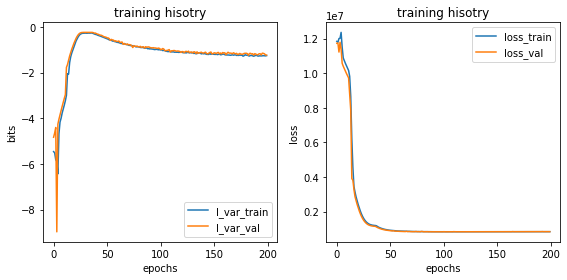

In [30]:
# Show training history
print('On test data:')
# x_test = test_df['x'].values
# y_test = test_df[y_cols].values


I_var_hist = model.history['I_var']
val_I_var_hist = model.history['val_I_var']

fig, axs = plt.subplots(1,2,figsize=[8,4])

ax = axs[0]
ax.plot(I_var_hist, label='I_var_train')
ax.plot(val_I_var_hist, label='I_var_val')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
#ax.set_xscale('log')
ax.set_title('training hisotry')

ax = axs[1]
ax.plot(model.history['loss'], label='loss_train')
ax.plot(model.history['val_loss'], label='loss_val')
# ax.set_xlim(100,300)
# ax.set_ylim(0.7*1e6,0.8*1e6)
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('loss')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_title('training hisotry')
fig.tight_layout()

In [31]:
model.history['loss'][-1]/1e6

0.8435386875

In [32]:
phi = gpmap.x_to_phi(x_test)
theta = np.squeeze(gpmap.weights[1].numpy())


In [33]:
theta

array([[-0.10891271, -0.5755114 , -0.40242693, ..., -0.49859497,
        -0.51917356, -0.49266994],
       [-0.1879843 , -0.09936199, -0.04282337, ..., -0.02419075,
        -0.13040672, -0.09155371],
       [-0.12114915, -0.41619095, -0.03283564, ..., -0.09262233,
        -0.3649472 , -0.1261291 ],
       ...,
       [-0.00284816, -0.49092782, -0.33698714, ..., -0.1142839 ,
         0.13074727, -0.06161269],
       [-0.48185754, -0.16590454, -0.09391424, ..., -0.27674648,
        -0.03024242, -0.15906115],
       [ 0.16652057,  0.16605042,  0.16610135, ..., -0.24268   ,
         0.03259161,  0.32614374]], dtype=float32)

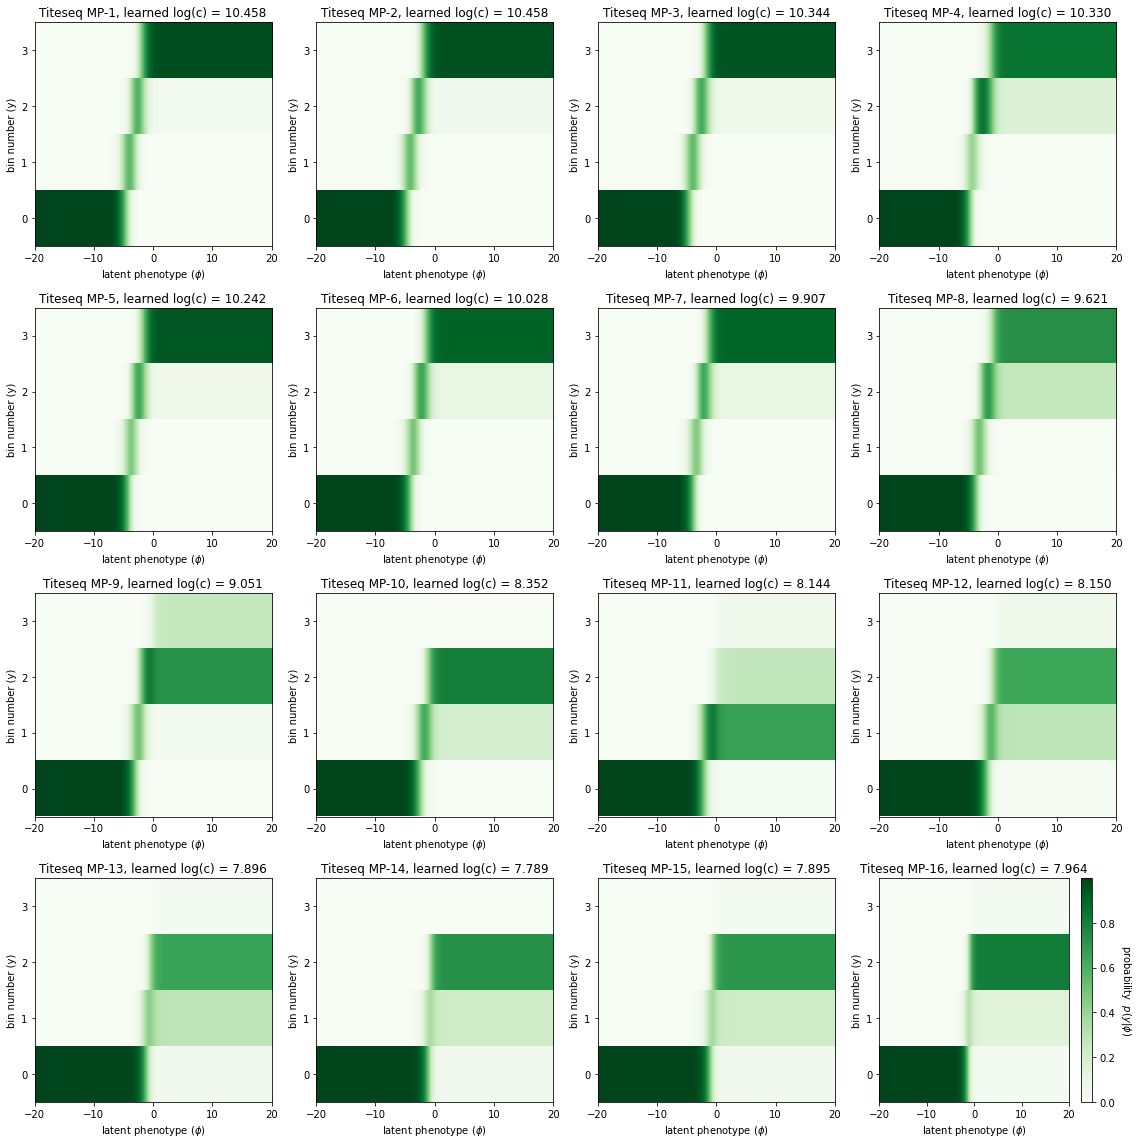

In [34]:
# Get G-P map parameters in matrix form


# Create grid in phi space
phi_lim = [-20, 20]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = mp_list[0].Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values



# Create figure with two panels
fig, axs = plt.subplots(4,4,figsize=[16,16])

mp_counter = 0
for i in range(4):
    for j in range(4):
        
        measurement_process = mp_list[mp_counter].p_of_y_given_phi(y_all, phi_grid)
        # Right panel: draw measurement process as heatmap
        ax = axs[i,j]

        im = ax.imshow(measurement_process,
                       cmap='Greens',
                       extent=phi_lim+y_lim,
                       vmin=0,
                       origin='lower',
                       interpolation='nearest',
                       aspect="auto")
        ax.set_yticks(y_all)
        ax.set_ylabel('bin number (y)')
        ax.set_xlabel('latent phenotype ($\phi$)')
        ax.set_title(f'Titeseq MP-{mp_counter+1}, learned log(c) = {(mp_list[mp_counter].get_weights()[0][0]):.3f}')
        mp_counter+=1
        
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")
fig.tight_layout()

fig.savefig('ace2rbd_Titeseq_measurment_prcoess.png',dpi=300,bbox_inches='tight')


In [35]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')

bloom_bind_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    #temp_df['bind_lib1']
    #expr_lib1
    bloom_bind_df.loc[site-1] = temp_df['bind_avg'].values[0:20]

bloom_bind_df.head()


,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.03,-0.09,0.03,0.00,-0.10,-0.04,-0.02,-0.07,-0.01,-0.05,-0.02,0.00,-0.03,0.01,-0.02,-0.03,0.06,-0.04,-0.16,-0.06
1,0.00,-0.09,-0.02,0.08,-0.22,-0.08,0.04,0.00,-0.05,0.00,0.00,0.00,0.06,-0.02,0.00,-0.04,-0.03,0.00,-0.03,-0.03
2,-0.01,-0.14,-0.01,-0.15,-0.15,-0.07,-0.07,-0.06,-0.01,-0.01,-0.02,-0.06,0.03,0.02,0.00,-0.08,0.00,-0.05,-0.21,-0.07
3,-0.03,-0.11,0.07,0.01,-0.22,-0.03,-0.02,-0.20,-0.03,-0.20,-0.05,0.00,-0.18,0.01,0.00,-0.06,-0.04,-0.07,-0.24,-0.09
4,0.04,-0.11,0.00,0.06,-0.03,-0.08,-0.03,-0.02,-0.03,0.00,0.01,0.03,0.06,-0.02,-0.01,0.01,0.02,-0.08,-0.05,-0.02


In [36]:
bloom_single_mut_df = pd.read_csv('single_mut_effects_Bloom.txt')
bloom_exp_df = pd.DataFrame(columns=alphabet)
for site in range(1,201+1,):

    temp_df = bloom_single_mut_df[bloom_single_mut_df['site_RBD']==site].copy()
    temp_df['expr_lib1']
    bloom_exp_df.loc[site-1] = temp_df['expr_avg'].values[0:20]
    
bloom_exp_df.head()    

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,-0.11,-1.26,-0.44,-0.31,-0.70,-0.25,-0.61,-0.85,-0.20,-0.75,-0.75,0.00,-0.21,-0.53,-0.44,-0.33,-0.34,-0.61,-1.12,-1.02
1,0.00,-0.12,0.03,0.01,-0.10,0.14,0.05,0.00,-0.06,-0.03,-0.02,0.05,-0.17,0.07,-0.04,-0.03,-0.04,0.02,-0.33,-0.07
2,-0.37,-0.93,-0.27,-0.31,-0.89,-0.41,-0.29,-1.03,-0.20,-0.55,-0.47,-0.35,-0.28,-0.35,-0.54,-0.04,0.00,-0.56,-0.63,-0.62
3,-0.12,-0.57,-0.04,-0.05,-0.97,-0.21,-0.12,-0.67,-0.02,-0.72,-0.40,0.00,-0.55,-0.08,-0.12,-0.19,-0.02,-0.47,-1.01,-0.61
4,-0.01,-0.38,-0.09,0.11,-0.16,-0.16,-0.10,-0.16,0.02,0.00,-0.15,-0.08,0.09,-0.05,-0.14,-0.08,-0.08,-0.10,-0.13,-0.12


In [37]:
theta_df = pd.DataFrame(theta,columns=alphabet)

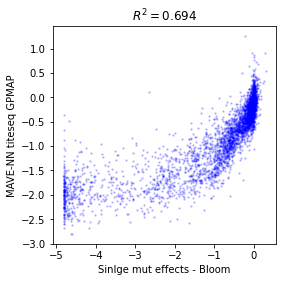

In [38]:
fig, axs = plt.subplots(1,1,figsize=[4,4])

# Left panel: draw logo using logomaker
ax = axs
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_df.fillna(0).values.ravel())[0,1]**2
ax.scatter(bloom_bind_df.fillna(0).values,theta_df.fillna(0).values,s=2,alpha=0.2,color='blue')
ax.set_xlabel('Sinlge mut effects - Bloom')
ax.set_ylabel('MAVE-NN titeseq GPMAP')
ax.set_title(f'$R^2 = {Rsq:.3f}$')
# ax.set_xticks(np.arange(0,201,5))
# ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])
plt.show()

In [39]:
theta_lc = gpmap.get_theta(model,gauge='consensus')['theta_lc']
theta_lc_consensus_df = pd.DataFrame(theta_lc,columns=alphabet)

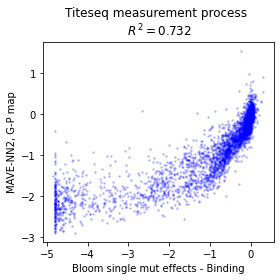

In [79]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_bind_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_bind_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Bloom single mut effects - Binding')
plt.title(f'Titeseq measurement process \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
plt.savefig('mavenn_bloom_binding_comparison.png',dpi=200,bbox_inches='tight')

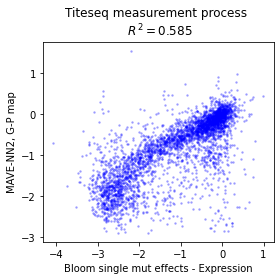

In [78]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(bloom_exp_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(bloom_exp_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.25,color='blue')

#lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Bloom single mut effects - Expression')
plt.title(f'Titeseq measurement process \n $R^2 = {Rsq:.3f}$')
plt.ylabel('MAVE-NN2, G-P map')
plt.tight_layout()
plt.savefig('mavenn_bloom_expression_comparison.png',dpi=200,bbox_inches='tight')

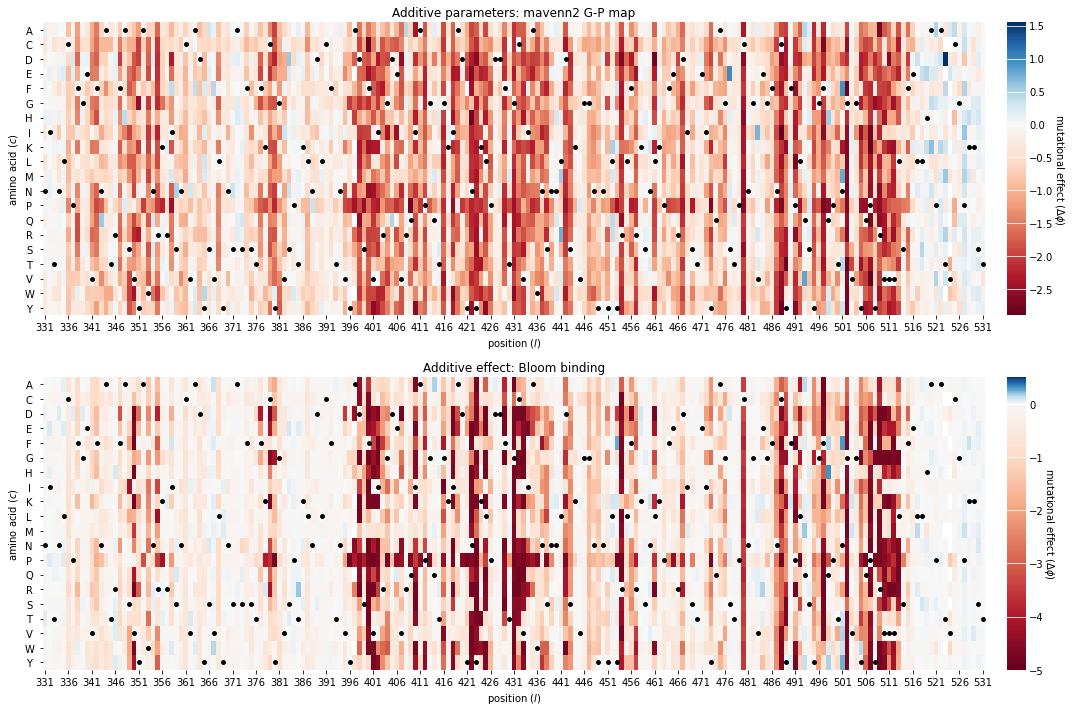

In [80]:

# Create figure
fig, axs = plt.subplots(2,1, figsize=(15,10))

# Draw heatmap
ax = axs[0]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=theta_lc_consensus_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                cmap_size='2%',
                                #clim = [-5,0.5],
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive parameters: mavenn2 G-P map')
heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
#fig.tight_layout(w_pad=5)
#fig.savefig('ace2rbd_g-p_map_mpa_sortseq_only_heatmap.png',dpi=300,bbox_inches='tight')

bloom_exp_df
# Create figure
#fig, ax = plt.subplots(1,1, figsize=(15,5))

# Draw heatmap
ax = axs[1]

heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_bind_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                clim = [-5,0.5],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom binding')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_titeseq_heatmap_comparisons.png',dpi=300,bbox_inches='tight')

In [81]:
theta_lc_consensus_dm_df = pd.read_csv('discrete_monotonic_ace2rbd_binding.csv')

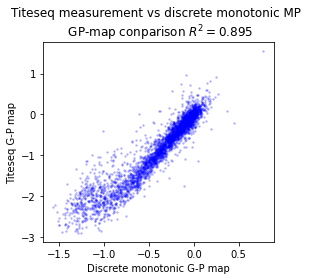

In [82]:
plt.figure(figsize=(4,4))
Rsq = np.corrcoef(theta_lc_consensus_dm_df.fillna(0).values.ravel(), theta_lc_consensus_df.fillna(0).values.ravel())[0,1]**2
plt.scatter(theta_lc_consensus_dm_df.values, theta_lc_consensus_df.values,s=2.5,alpha=0.2,color='blue')

#lims = [-5,1]
#plt.plot(lims,lims,'--',color='gray',zorder=-1)
plt.xlabel('Discrete monotonic G-P map')
plt.title(f'Titeseq measurement vs discrete monotonic MP \n GP-map conparison $R^2 = {Rsq:.3f}$')
plt.ylabel('Titeseq G-P map')
plt.tight_layout()
plt.savefig('Titeseq_discrete_monotonic_binding_comparison.png',dpi=200,bbox_inches='tight')

Get titration curves

In [83]:
#phi = gpmap.x_to_phi(x_test)

a = mp_list[0].get_weights()[0][0]

def mu_of_phi(c, 
              a=a,
              phi=phi,
              mu_neg=mu_neg):

    K_a_of_phi = 10**(phi)
    B = 10**(mu_neg)
    A = 10**(a)
    
    mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi
    
def Ka_of_c(c, 
            a=a,
            phi=phi,
            mu_neg=mu_neg):

    K_a_of_phi = np.exp(phi)
    B = 10**(mu_neg)
    A = 10**(a)
    
    mu_of_phi = np.log10(A*(c*K_a_of_phi)/(1+c*K_a_of_phi)+B)
    
    return mu_of_phi


In [75]:
# plt.figure(figsize=(5,5))

# #cs_ = np.arange(0.01,30,0.01)
# cs_bloom = np.arange(10**(-13),10**(-3),10**(-6))

# for _ in np.random.choice(np.arange(0,len(phi)),size=10):
#     plt.plot(cs_bloom,mu_of_phi(c=10**(cs_bloom),phi=phi[_]),'o-')
#     #plt.plot(cs_bloom,mu_of_phi(c=cs_bloom,phi=phi[_]),'o-')
    
    
# plt.xlabel('log concentration - grid (inferred)',fontsize=12)
# #plt.xscale('log')
# #plt.yscale('log')
# plt.ylabel('$\mu(\phi)$',fontsize=15)
# #plt.ylim(0,4)

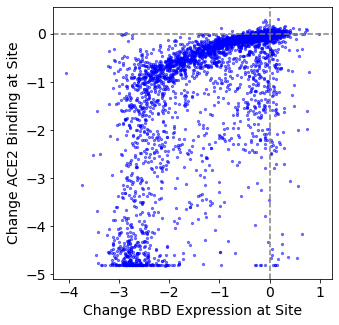

In [76]:
plt.figure(figsize=(5,5))
plt.scatter(bloom_exp_df.values.ravel(),bloom_bind_df.values.ravel(), color='blue',s=5,alpha=0.5)
plt.xlabel('Change RBD Expression at Site',fontsize=14)
plt.ylabel('Change ACE2 Binding at Site',fontsize=14)
plt.axvline(0,ls='--',color='gray')
plt.axhline(0,ls='--',color='gray')
plt.tick_params(labelsize=14)
plt.savefig('Bloom_binding_vs_expression.png',dpi=200,bbox_inches='tight')

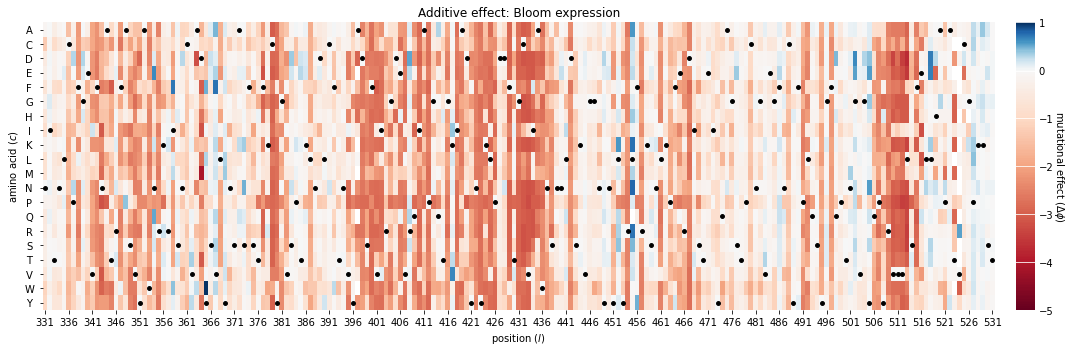

In [84]:

# Create figure
fig, ax = plt.subplots(1,1, figsize=(15,5))


heatmap_ax, cb = mavenn.heatmap(ax=ax,
                                values=bloom_exp_df.values,
                                alphabet=alphabet,
                                seq=model.x_stats['consensus_seq'],
                                seq_kwargs={'c':'black', 's':15},
                                cmap='RdBu',
                                cbar=True,
                                clim = [-5,1],
                                cmap_size='2%',
                                cmap_pad=.3,
                                ccenter=0)
# Style heatmap (can be different between two dataset)
#heatmap_ax.set_xticks()
heatmap_ax.tick_params(axis='y', which='major', pad=10)
heatmap_ax.set_xlabel('position ($l$)')
heatmap_ax.set_ylabel('amino acid ($c$)')
heatmap_ax.set_title(f'Additive effect: Bloom expression')

heatmap_ax.set_xticks(np.arange(0,201,5))
heatmap_ax.set_xticklabels([f'{x}' for x in range(331,531+1,5)])

# Style colorbar
cb.outline.set_visible(False)
cb.ax.tick_params(direction='in', size=20, color='white')
cb.set_label('mutational effect ($\Delta \phi$)', labelpad=5, rotation=-90, ha='center', va='center')

# Adjust figure and show
fig.tight_layout(w_pad=5)
fig.savefig('ace2rbd_g-p_map_heatmap_bloom_expression.png',dpi=300,bbox_inches='tight')

In [54]:
cs

[0,
 1e-13,
 3.162277660168379e-13,
 1e-12,
 3.1622776601683794e-12,
 1e-11,
 3.1622776601683794e-11,
 1e-10,
 3.1622776601683795e-10,
 1e-09,
 3.1622776601683795e-09,
 1e-08,
 3.162277660168379e-08,
 1e-07,
 3.162277660168379e-07,
 1e-06]